In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import os

(455, 276, 3)


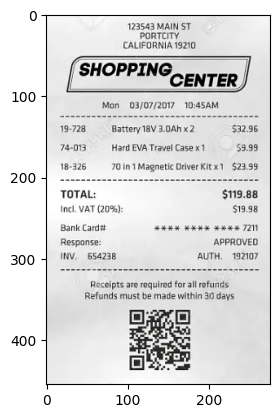

In [2]:
root_path = os.getcwd()
img_path = root_path+r"/test_imgs/shop_invoice.png"
cv_img = cv2.imread(img_path)
print(cv_img.shape)
plt.imshow(cv_img)

(455, 276)


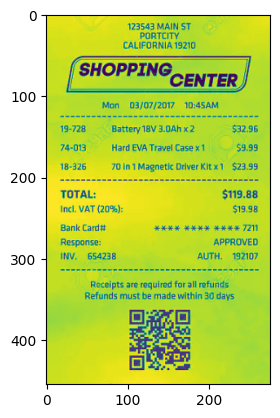

In [3]:
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img)

Line Detection

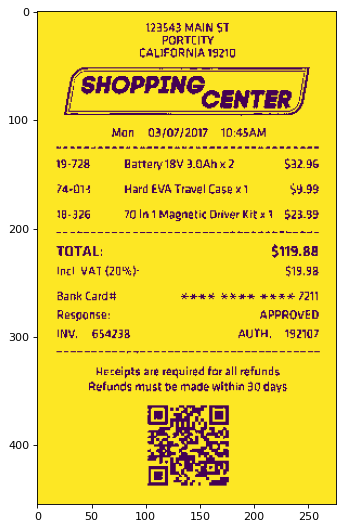

In [8]:
threshold_img = cv2.threshold(gray_img,50,100,8)[1]
figure(figsize=(10,8),dpi=80)
plt.imshow(threshold_img)

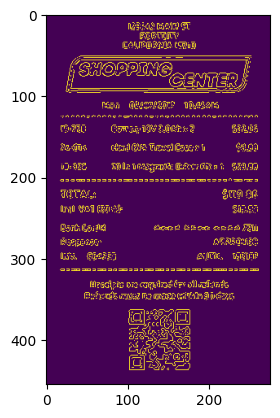

In [10]:
edges = cv2.Canny(threshold_img, 50, 200, None, 3)
figure(figsize=(10,8),dpi=80)
plt.imshow(edges)

In [11]:
import math


#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(cv_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(lines))
print(lines)

No of lines :  7
[[[ 18 313 260 313]]

 [[ 18 315 260 315]]

 [[ 18 125 259 125]]

 [[ 18 205 259 205]]

 [[ 18 203 259 203]]

 [[ 24 126 259 126]]

 [[ 17 204 259 204]]]


In [15]:
print(lines[0][0][1])

313


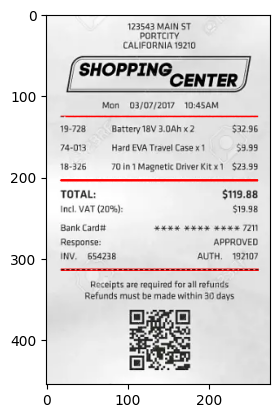

In [27]:
copy_img = cv_img.copy()

actual_lines = {}

count=0
for cur_line in lines:
    start_point = (cur_line[0][0],cur_line[0][1])
    end_point = (cur_line[0][2],cur_line[0][3])
    copy_img = cv2.line(copy_img, start_point, end_point, (255,0,0), 1) 
    actual_lines[count] = cur_line[0]
    count += 1
plt.imshow(copy_img)

In [28]:
actual_lines
# {0: array([[ 18, 313, 260, 313]], dtype=int32),
#  1: array([[ 18, 315, 260, 315]], dtype=int32),
#  2: array([[ 18, 125, 259, 125]], dtype=int32),
#  3: array([[ 18, 205, 259, 205]], dtype=int32),
#  4: array([[ 18, 203, 259, 203]], dtype=int32),
#  5: array([[ 24, 126, 259, 126]], dtype=int32),
#  6: array([[ 17, 204, 259, 204]], dtype=int32)}

{0: array([ 18, 313, 260, 313], dtype=int32),
 1: array([ 18, 315, 260, 315], dtype=int32),
 2: array([ 18, 125, 259, 125], dtype=int32),
 3: array([ 18, 205, 259, 205], dtype=int32),
 4: array([ 18, 203, 259, 203], dtype=int32),
 5: array([ 24, 126, 259, 126], dtype=int32),
 6: array([ 17, 204, 259, 204], dtype=int32)}

In [32]:
first_line = actual_lines[2]
first_line

array([ 18, 125, 259, 125], dtype=int32)

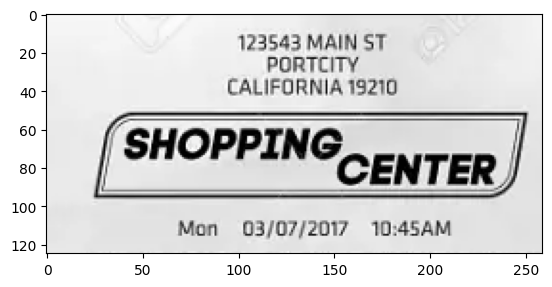

In [33]:
first_img = copy_img[:first_line[1],:first_line[2],:]
plt.imshow(first_img)

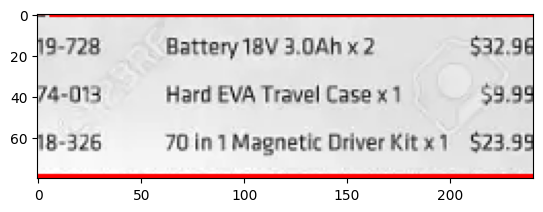

In [35]:
second_line = actual_lines[3]
second_img = copy_img[first_line[1]:second_line[1],second_line[0]:second_line[2],:]
plt.imshow(second_img)

In [36]:
cv2.imwrite("first_part.png",second_img)

True